In [37]:
import pandas as pd
import numpy as np
import pyreadr
from scipy.spatial import distance
from tqdm import tqdm

import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

In [3]:
#main = pyreadr.read_r('/Users/annieulichney/Library/CloudStorage/Box-Box/Deforestation_MachineLearning/Data/analysis.Rdata')
main = pyreadr.read_r('/Users/annieulichney/Desktop/Deforestation/analysis.Rdata') #read R dataframe into Python

df_full = pd.DataFrame(main['forest_full'])
#df = df_full.sample(5000)

df = df_full

In [4]:
df.shape

(2427898, 35)

## Economic Data

In [5]:
df['PIB'] = df['pib_pc'] * df['populacao']

In [6]:
dict(sorted((df.isna().sum()).to_dict().items(), key=lambda item: item[1])).values()

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Labor and Social Security (RAIS) Data

In [7]:
rais_read = pyreadr.read_r('/Users/annieulichney/Desktop/Deforestation/rais_setor_munic.Rdata')
rais_df = pd.DataFrame(rais_read['rais3'])
rais_df.head()

,id_municipio,ano,n_empresas_ADMIN PUBLICA,n_empresas_AGRICULTURA,n_empresas_ALIMENTOS E BEBIDAS,n_empresas_ALOJAMENTO E ALIMENTACAO,n_empresas_ALUGUEL EQUIPAMENTO,n_empresas_ATACADO,n_empresas_ATIVIDADES ASSOCIATIVAS,n_empresas_AUTOMOVEIS E TRANSPORTE,...,n_empregos_IMOBILIARIA,n_empregos_RECICLAGEM,n_empregos_COUROS E CALCADO,n_empregos_BORRACHA E PLASTICO,n_empregos_TEXTEIS,n_empregos_PESQUISA E DESENVOLVIMENTO,n_empregos_TRANSPORTE AEREO,n_empregos_FUMO,n_empregos_REFINO PETROLEO,n_empregos_
0,1100015,2000,2,27,15,13,1,38,126,5,...,0,0,0,0,0,0,0,0,0,0
1,1100015,2001,3,32,17,10,1,40,118,4,...,0,0,0,0,0,0,0,0,0,0
2,1100015,2002,3,45,23,13,0,39,127,4,...,0,0,0,0,0,0,0,0,0,0
3,1100015,2003,2,65,23,13,0,33,109,4,...,0,0,0,0,0,0,0,0,0,0
4,1100015,2004,2,83,44,10,1,29,110,3,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#english names of columns 
rais_df.columns = ['id_municipio', 'ano', 
       'n_companies_PUBLIC ADMIN',
       'n_companies_AGRICULTURE', 'n_companies_FOOD AND DRINKS',
       'n_companies_ACCOMODATION AND FOOD',
       'n_companies_EQUIPMENT RENTAL', 'n_companies_WHOLESALE',
       'n_companies_ASSOCIATIVE ACTIVITIES',
       'n_companies_AUTOMOBILES AND TRANSPORT', 'n_companies_FINANCIAL ASSISTANCE',
       'n_companies_TRADE REP VEHICLES', 'n_companies_CONSTRUCTION',
       'n_companies_MAIL AND TELECOM', 'n_companies_CULTURE AND SPORT',
       'n_companies_EDITING AND PRINTING', 'n_companies_EDUCATION',
       'n_companies_ELECTRICITY AND GAS', 'n_companies_FINANCES',
       'n_companies_CLEANING AND SEWAGE', 'n_companies_MACHINERY',
       'n_companies_BASIC METALLURGY', 'n_companies_MINING',
       'n_companies_WOOD PROD', 'n_companies_NON-METALLIC MINERAL PRODUCTS',
       'n_companies_HEALTH', 'n_companies_SERVICES FOR COMPANIES',
       'n_companies_PERSONAL SERVICES', 'n_companies_TRANSPORTATION',
       'n_companies_GROUND TRANSPORT',
       'n_companies_WATER TREATMENT AND DISTRIBUTION', 'n_companies_RETAIL',
       'n_companies_COMPUTING', 'n_companies_INSURANCE AND SOCIAL SECURITY',
       'n_companies_METALLIC PRODUCTS', 'n_companies_DOMESTIC SERVICES',
       'n_companies_FORESTRY', 'n_companies_CLOTHING',
       'n_companies_PAPER',
       'n_companies_INTERNATIONAL BODIES',
       'n_companies_OIL AND GAS', 'n_companies_FISHING AND AQUACULTURE',
       'n_companies_CHEMICALS', 'n_companies_WATER-BASED TRANSPORTATION',
       'n_companies_REAL ESTATE', 'n_companies_RECYCLING',
       'n_companies_LEATHERS AND FOOTWEAR', 'n_companies_RUBBER AND PLASTIC',
       'n_companies_TEXTILES', 'n_companies_RESEARCH AND DEVELOPMENT',
       'n_companies_AERO TRANSPORT', 'n_companies_SMOKE',
       'n_companies_PETROLEUM REFINING', 'n_companies_',
                   
       'n_jobs_PUBLIC ADMIN',
       'n_jobs_AGRICULTURE', 'n_jobs_FOOD AND DRINKS',
       'n_jobs_ACCOMODATION AND FOOD',
       'n_jobs_EQUIPMENT RENTAL', 'n_jobs_WHOLESALE',
       'n_jobs_ASSOCIATIVE ACTIVITIES',
       'n_jobs_AUTOMOBILES AND TRANSPORT', 'n_jobs_FINANCIAL ASSISTANCE',
       'n_jobs_TRADE REP VEHICLES', 'n_jobs_CONSTRUCTION',
       'n_jobs_MAIL AND TELECOM', 'n_jobs_CULTURE AND SPORT',
       'n_jobs_EDITING AND PRINTING', 'n_jobs_EDUCATION',
       'n_jobs_ELECTRICITY AND GAS', 'n_jobs_FINANCES',
       'n_jobs_CLEANING AND SEWAGE', 'n_jobs_MACHINERY',
       'n_jobs_BASIC METALLURGY', 'n_jobs_MINING',
       'n_jobs_WOOD PROD', 'n_jobs_NON-METALLIC MINERAL PRODUCTS',
       'n_jobs_HEALTH', 'n_jobs_SERVICES FOR COMPANIES',
       'n_jobs_PERSONAL SERVICES', 'n_jobs_TRANSPORTATION',
       'n_jobs_GROUND TRANSPORT',
       'n_jobs_WATER TREATMENT AND DISTRIBUTION', 'n_jobs_RETAIL',
       'n_jobs_COMPUTING', 'n_jobs_INSURANCE AND SOCIAL SECURITY',
       'n_jobs_METALLIC PRODUCTS', 'n_jobs_DOMESTIC SERVICES',
       'n_jobs_FORESTRY', 'n_jobs_CLOTHING',
       'n_jobs_PAPER',
       'n_jobs_INTERNATIONAL BODIES',
       'n_jobs_OIL AND GAS', 'n_jobs_FISHING AND AQUACULTURE',
       'n_jobs_CHEMICALS', 'n_jobs_WATER-BASED TRANSPORTATION',
       'n_jobs_REAL ESTATE', 'n_jobs_RECYCLING',
       'n_jobs_LEATHERS AND FOOTWEAR', 'n_jobs_RUBBER AND PLASTIC',
       'n_jobs_TEXTILES', 'n_jobs_RESEARCH AND DEVELOPMENT',
       'n_jobs_AERO TRANSPORT', 'n_jobs_SMOKE',
       'n_jobs_PETROLEUM REFINING', 'n_jobs_']

#sort the 51 categories of companies into industrial and service oriented

industrial_companies = ['n_companies_AGRICULTURE',
                    'n_companies_AUTOMOBILES AND TRANSPORT',
                    'n_companies_TRADE REP VEHICLES', 
                    'n_companies_WOOD PROD', 
                    'n_companies_NON-METALLIC MINERAL PRODUCTS',
                    'n_companies_BASIC METALLURGY', 
                    'n_companies_MINING',
                    'n_companies_TRANSPORTATION',
                    'n_companies_GROUND TRANSPORT',
                    'n_companies_WATER-BASED TRANSPORTATION',
                    'n_companies_AERO TRANSPORT',
                    'n_companies_CONSTRUCTION',
                    'n_companies_OIL AND GAS',
                    'n_companies_MACHINERY',
                    'n_companies_FORESTRY', 
                    'n_companies_ELECTRICITY AND GAS',
                    'n_companies_FISHING AND AQUACULTURE',
                    'n_companies_CHEMICALS', 
                    'n_companies_METALLIC PRODUCTS', 
                    'n_companies_PAPER',
                    'n_companies_WATER TREATMENT AND DISTRIBUTION', 
                    'n_companies_CLEANING AND SEWAGE', 
                    'n_companies_RECYCLING',
                    'n_companies_RUBBER AND PLASTIC', 
                    'n_companies_SMOKE',
                    'n_companies_PETROLEUM REFINING']

service_companies = ['n_companies_PUBLIC ADMIN',
                    'n_companies_FOOD AND DRINKS',
                    'n_companies_ACCOMODATION AND FOOD',
                    'n_companies_EQUIPMENT RENTAL', 
                    'n_companies_WHOLESALE',
                    'n_companies_LEATHERS AND FOOTWEAR',
                    'n_companies_TEXTILES',
                    'n_companies_ASSOCIATIVE ACTIVITIES',
                    'n_companies_FINANCIAL ASSISTANCE',
                    'n_companies_HEALTH', 
                    'n_companies_SERVICES FOR COMPANIES',
                    'n_companies_PERSONAL SERVICES', 
                    'n_companies_MAIL AND TELECOM', 
                    'n_companies_EDITING AND PRINTING', 
                    'n_companies_EDUCATION',
                    'n_companies_DOMESTIC SERVICES',
                    'n_companies_INSURANCE AND SOCIAL SECURITY',
                    'n_companies_RETAIL',
                    'n_companies_FINANCES',
                    'n_companies_CULTURE AND SPORT',
                    'n_companies_REAL ESTATE',
                    'n_companies_RESEARCH AND DEVELOPMENT',
                    'n_companies_COMPUTING',
                    'n_companies_CLOTHING', 
                    'n_companies_INTERNATIONAL BODIES',]

#sort the 51 categories of jobs into industrial and service oriented

industrial_jobs = ['n_jobs_AGRICULTURE',
                    'n_jobs_AUTOMOBILES AND TRANSPORT',
                    'n_jobs_TRADE REP VEHICLES', 
                    'n_jobs_WOOD PROD', 
                    'n_jobs_NON-METALLIC MINERAL PRODUCTS',
                    'n_jobs_BASIC METALLURGY', 
                    'n_jobs_MINING',
                    'n_jobs_TRANSPORTATION',
                    'n_jobs_GROUND TRANSPORT',
                    'n_jobs_WATER-BASED TRANSPORTATION',
                    'n_jobs_AERO TRANSPORT',
                    'n_jobs_CONSTRUCTION',
                    'n_jobs_OIL AND GAS',
                    'n_jobs_MACHINERY',
                    'n_jobs_FORESTRY', 
                    'n_jobs_ELECTRICITY AND GAS',
                    'n_jobs_FISHING AND AQUACULTURE',
                    'n_jobs_CHEMICALS', 
                    'n_jobs_METALLIC PRODUCTS', 
                    'n_jobs_PAPER',
                    'n_jobs_WATER TREATMENT AND DISTRIBUTION', 
                    'n_jobs_CLEANING AND SEWAGE', 
                    'n_jobs_RECYCLING',
                    'n_jobs_RUBBER AND PLASTIC', 
                    'n_jobs_SMOKE',
                    'n_jobs_PETROLEUM REFINING'   ]

service_jobs = ['n_jobs_PUBLIC ADMIN',
                    'n_jobs_FOOD AND DRINKS',
                    'n_jobs_ACCOMODATION AND FOOD',
                    'n_jobs_EQUIPMENT RENTAL', 
                    'n_jobs_WHOLESALE',
                    'n_jobs_LEATHERS AND FOOTWEAR',
                    'n_jobs_TEXTILES',
                    'n_jobs_ASSOCIATIVE ACTIVITIES',
                    'n_jobs_FINANCIAL ASSISTANCE',
                    'n_jobs_HEALTH', 
                    'n_jobs_SERVICES FOR COMPANIES',
                    'n_jobs_PERSONAL SERVICES', 
                    'n_jobs_MAIL AND TELECOM', 
                    'n_jobs_EDITING AND PRINTING', 
                    'n_jobs_EDUCATION',
                    'n_jobs_DOMESTIC SERVICES',
                    'n_jobs_INSURANCE AND SOCIAL SECURITY',
                    'n_jobs_RETAIL',
                    'n_jobs_FINANCES',
                    'n_jobs_CULTURE AND SPORT',
                    'n_jobs_REAL ESTATE',
                    'n_jobs_RESEARCH AND DEVELOPMENT',
                    'n_jobs_COMPUTING',
                    'n_jobs_CLOTHING', 
                    'n_jobs_INTERNATIONAL BODIES',]

#group 
rais_df['n_jobs_TOTAL INDUSTRIAL'] = rais_df[industrial_jobs].sum(axis=1)
rais_df['n_jobs_TOTAL SERVICE'] = rais_df[service_jobs].sum(axis=1)

rais_df['n_companies_TOTAL INDUSTRIAL'] = rais_df[industrial_companies].sum(axis=1)
rais_df['n_companies_TOTAL SERVICE'] = rais_df[service_companies].sum(axis=1)

companies_columns_list = ['n_companies_PUBLIC ADMIN',
       'n_companies_AGRICULTURE', 'n_companies_FOOD AND DRINKS',
       'n_companies_ACCOMODATION AND FOOD',
       'n_companies_EQUIPMENT RENTAL', 'n_companies_WHOLESALE',
       'n_companies_ASSOCIATIVE ACTIVITIES',
       'n_companies_AUTOMOBILES AND TRANSPORT', 'n_companies_FINANCIAL ASSISTANCE',
       'n_companies_TRADE REP VEHICLES', 'n_companies_CONSTRUCTION',
       'n_companies_MAIL AND TELECOM', 'n_companies_CULTURE AND SPORT',
       'n_companies_EDITING AND PRINTING', 'n_companies_EDUCATION',
       'n_companies_ELECTRICITY AND GAS', 'n_companies_FINANCES',
       'n_companies_CLEANING AND SEWAGE', 'n_companies_MACHINERY',
       'n_companies_BASIC METALLURGY', 'n_companies_MINING',
       'n_companies_WOOD PROD', 'n_companies_NON-METALLIC MINERAL PRODUCTS',
       'n_companies_HEALTH', 'n_companies_SERVICES FOR COMPANIES',
       'n_companies_PERSONAL SERVICES', 'n_companies_TRANSPORTATION',
       'n_companies_GROUND TRANSPORT',
       'n_companies_WATER TREATMENT AND DISTRIBUTION', 'n_companies_RETAIL',
       'n_companies_COMPUTING', 'n_companies_INSURANCE AND SOCIAL SECURITY',
       'n_companies_METALLIC PRODUCTS', 'n_companies_DOMESTIC SERVICES',
       'n_companies_FORESTRY', 'n_companies_CLOTHING',
       'n_companies_PAPER',
       'n_companies_INTERNATIONAL BODIES',
       'n_companies_OIL AND GAS', 'n_companies_FISHING AND AQUACULTURE',
       'n_companies_CHEMICALS', 'n_companies_WATER-BASED TRANSPORTATION',
       'n_companies_REAL ESTATE', 'n_companies_RECYCLING',
       'n_companies_LEATHERS AND FOOTWEAR', 'n_companies_RUBBER AND PLASTIC',
       'n_companies_TEXTILES', 'n_companies_RESEARCH AND DEVELOPMENT',
       'n_companies_AERO TRANSPORT', 'n_companies_SMOKE',
       'n_companies_PETROLEUM REFINING', 'n_companies_']

rais_df['n_companies_TOTAL'] = rais_df[companies_columns_list].sum(axis=1)

jobs_columns_list = ['n_jobs_PUBLIC ADMIN',
       'n_jobs_AGRICULTURE', 'n_jobs_FOOD AND DRINKS',
       'n_jobs_ACCOMODATION AND FOOD',
       'n_jobs_EQUIPMENT RENTAL', 'n_jobs_WHOLESALE',
       'n_jobs_ASSOCIATIVE ACTIVITIES',
       'n_jobs_AUTOMOBILES AND TRANSPORT', 'n_jobs_FINANCIAL ASSISTANCE',
       'n_jobs_TRADE REP VEHICLES', 'n_jobs_CONSTRUCTION',
       'n_jobs_MAIL AND TELECOM', 'n_jobs_CULTURE AND SPORT',
       'n_jobs_EDITING AND PRINTING', 'n_jobs_EDUCATION',
       'n_jobs_ELECTRICITY AND GAS', 'n_jobs_FINANCES',
       'n_jobs_CLEANING AND SEWAGE', 'n_jobs_MACHINERY',
       'n_jobs_BASIC METALLURGY', 'n_jobs_MINING',
       'n_jobs_WOOD PROD', 'n_jobs_NON-METALLIC MINERAL PRODUCTS',
       'n_jobs_HEALTH', 'n_jobs_SERVICES FOR COMPANIES',
       'n_jobs_PERSONAL SERVICES', 'n_jobs_TRANSPORTATION',
       'n_jobs_GROUND TRANSPORT',
       'n_jobs_WATER TREATMENT AND DISTRIBUTION', 'n_jobs_RETAIL',
       'n_jobs_COMPUTING', 'n_jobs_INSURANCE AND SOCIAL SECURITY',
       'n_jobs_METALLIC PRODUCTS', 'n_jobs_DOMESTIC SERVICES',
       'n_jobs_FORESTRY', 'n_jobs_CLOTHING',
       'n_jobs_PAPER',
       'n_jobs_INTERNATIONAL BODIES',
       'n_jobs_OIL AND GAS', 'n_jobs_FISHING AND AQUACULTURE',
       'n_jobs_CHEMICALS', 'n_jobs_WATER-BASED TRANSPORTATION',
       'n_jobs_REAL ESTATE', 'n_jobs_RECYCLING',
       'n_jobs_LEATHERS AND FOOTWEAR', 'n_jobs_RUBBER AND PLASTIC',
       'n_jobs_TEXTILES', 'n_jobs_RESEARCH AND DEVELOPMENT',
       'n_jobs_AERO TRANSPORT', 'n_jobs_SMOKE',
       'n_jobs_PETROLEUM REFINING', 'n_jobs_']

rais_df['n_jobs_TOTAL'] = rais_df[jobs_columns_list].sum(axis=1)

In [9]:
rais_df[jobs_columns_list] = rais_df[jobs_columns_list].div(rais_df.n_jobs_TOTAL, axis=0)
rais_df[companies_columns_list] = rais_df[companies_columns_list].div(rais_df.n_companies_TOTAL, axis=0)
rais_df.head()

,id_municipio,ano,n_companies_PUBLIC ADMIN,n_companies_AGRICULTURE,n_companies_FOOD AND DRINKS,n_companies_ACCOMODATION AND FOOD,n_companies_EQUIPMENT RENTAL,n_companies_WHOLESALE,n_companies_ASSOCIATIVE ACTIVITIES,n_companies_AUTOMOBILES AND TRANSPORT,...,n_jobs_AERO TRANSPORT,n_jobs_SMOKE,n_jobs_PETROLEUM REFINING,n_jobs_,n_jobs_TOTAL INDUSTRIAL,n_jobs_TOTAL SERVICE,n_companies_TOTAL INDUSTRIAL,n_companies_TOTAL SERVICE,n_companies_TOTAL,n_jobs_TOTAL
0,1100015,2000,0.003711,0.050093,0.027829,0.024119,0.001855,0.070501,0.233766,0.009276,...,0.0,0.0,0.0,0.0,336,860,118,421,539,1196
1,1100015,2001,0.005525,0.058932,0.031308,0.018416,0.001842,0.073665,0.217311,0.007366,...,0.0,0.0,0.0,0.0,355,830,124,419,543,1185
2,1100015,2002,0.004992,0.074875,0.038270,0.021631,0.000000,0.064892,0.211314,0.006656,...,0.0,0.0,0.0,0.0,418,1022,145,456,601,1440
3,1100015,2003,0.003190,0.103668,0.036683,0.020734,0.000000,0.052632,0.173844,0.006380,...,0.0,0.0,0.0,0.0,477,1152,163,464,627,1629
4,1100015,2004,0.003125,0.129688,0.068750,0.015625,0.001563,0.045312,0.171875,0.004687,...,0.0,0.0,0.0,0.0,516,1094,180,460,640,1610


In [10]:
df = pd.merge(df, rais_df,  how = 'left', left_on = ['ID','year'], right_on = ['id_municipio','ano'])

In [11]:
dict(sorted((df.isna().sum()).to_dict().items(), key=lambda item: item[1])).values()

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Year Deforest Data Set

In [13]:
# Mojui Dos Campos is a newly-created municipality, liberated from Santarem in 2006
#fill in the missing points with the munipcality that is closest to it before the name change

mojui = df[df.ID == 1504752]
print(np.unique(mojui.ano))
inds_list = mojui.index

[2013 2014 2015 2016]


In [14]:
#for each missing element, find the point that was closest to it before it changed names
#fill in the information from that muni from year_deforest to fill in the nas of that row!

for i in tqdm(inds_list):  
    

    this_x = mojui.x[i]
    this_y = mojui.y[i]
    this_year = mojui.year[i]

    mojui_id = 1504752

    prior_to_change = df[df.year < 2013]

    closest_point = np.argmin((distance.cdist([(this_x, this_y)], list(zip(prior_to_change.x, prior_to_change.y)))))

    df.loc[i, 'ID'] = df.iloc[closest_point].ID



100%|██████████| 672/672 [40:50<00:00,  3.65s/it]


In [15]:
#check the id of the new ones here, sanity check should be santarem's id! 

In [20]:
#merge in year deforest
result1 = pyreadr.read_r('/Users/annieulichney/Desktop/Deforestation/year_deforest.RData')
df2 = pd.DataFrame(result1['year_deforest'])

#df2 = df2.fillna(0)
df2 = df2.drop(['term', 'inc', 'area', 'per'], axis = 1)
df2['audits'] = df2['audits'].fillna(0)
df2.head()


,year,munic_id,murder_threats,assassination,assassination_attempt,emiss_agr,emiss_agropec,emiss_pec,f_emitted_count,expen_agri,...,expen_petrol,expen_prom_ani_pro,expen_prom_veg_pro,expen_other_agr,expen_agr_defense,expen_min_fuel,illegal_mining,illegal_other,illegal_industry,audits
0,2000,1100015,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,2000,1100023,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,173.167599,0.0,1744.914255,0.0
2,2000,1100031,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,2000,1100049,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,2000,1100056,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [23]:
df = pd.merge(df, df2,  how = 'left', left_on = ['ID','year'], right_on = ['munic_id','year'])

In [24]:
#fill nas with 0 for audits
df['audits'] = df['audits'].fillna(0)



#now deal with missing emissions entries
# 3 emissions variables 'emiss_agr', 'emiss_agropec', 'emiss_pec',
#In the data, variable “atividade_economica” contains the values AGR, PEC and AGROPEC. 
#So, for each municipality/year, sum the emissions (emissao) that correspond to atividade_economica 
#== “AGROPEC”, “AGR” and “PEC” and that should give you the three variables.
# 
# #file_path = '/Users/annieulichney/Library/CloudStorage/Box-Box/Deforestation_MachineLearning/Data/Rdata/emissions2016.Rdata'
file_path = '/Users/annieulichney/Desktop/Deforestation/emissions2016.Rdata'

emission2016 = pyreadr.read_r(file_path)
emdf = pd.DataFrame(emission2016['df.emissions'])
#emdf.head()

#agro + pec
both = emdf.loc[emdf['atividade_economica'].isin(['PEC', 'AGR'])][['ano', 'id_municipio', 'atividade_economica', 'emissao']]
both.columns = ['ano', 'id_municipio', 'atividade_economica', 'emissao_agropec_2016']


both['emissao_agropec_2016'] = both['emissao_agropec_2016'].fillna(0)

both_summed = pd.DataFrame(both.groupby(['ano', 'id_municipio'])['emissao_agropec_2016'].sum()).reset_index()

#change dtype
both_summed['id_municipio'] = both_summed['id_municipio'].astype(int)
both_summed['ano'] = both_summed['ano'].astype(int)

#both_summed.head()

#agro only
agro_df = emdf.loc[emdf['atividade_economica'].isin(['AGR'])][['ano', 'id_municipio', 'atividade_economica', 'emissao']]
agro_df.columns = ['ano', 'id_municipio', 'atividade_economica', 'emissao_agr_2016']


agro_df['emissao_agr_2016'] = agro_df['emissao_agr_2016'].fillna(0)

agro_df_summed = pd.DataFrame(agro_df.groupby(['ano', 'id_municipio'])['emissao_agr_2016'].sum()).reset_index()

#change dtype
agro_df_summed['id_municipio'] = agro_df_summed['id_municipio'].astype(int)
agro_df_summed['ano'] = agro_df_summed['ano'].astype(int)

#agro_df_summed.head()

#agro only
pec_df = emdf.loc[emdf['atividade_economica'].isin(['PEC'])][['ano', 'id_municipio', 'atividade_economica', 'emissao']]
pec_df.columns = ['ano', 'id_municipio', 'atividade_economica', 'emissao_pec_2016']


pec_df['emissao_pec_2016'] = pec_df['emissao_pec_2016'].fillna(0)

pec_df_summed = pd.DataFrame(pec_df.groupby(['ano', 'id_municipio'])['emissao_pec_2016'].sum()).reset_index()

#change dtype
pec_df_summed['id_municipio'] = pec_df_summed['id_municipio'].astype(int)
pec_df_summed['ano'] = pec_df_summed['ano'].astype(int)

#pec_df_summed.head()

#merge twice to get all 3 columns
emiss_df = pd.merge(agro_df_summed, both_summed,  how = 'left', left_on = ['id_municipio','ano'], right_on = ['id_municipio','ano'])
emiss_df = pd.merge(pec_df_summed, emiss_df,  how = 'left', left_on = ['id_municipio','ano'], right_on = ['id_municipio','ano'])


df = pd.merge(df, emiss_df,  how = 'left', left_on = ['ID','year'], right_on = ['id_municipio','ano'])


df['emissao_pec_2016'] = df['emissao_pec_2016'].fillna(0)
df['emissao_agr_2016'] = df['emissao_agr_2016'].fillna(0)
df['emissao_agropec_2016'] = df['emissao_agropec_2016'].fillna(0)


df['emiss_pec'] = df['emiss_pec'].fillna(0)
df['emiss_agr'] = df['emiss_agr'].fillna(0)
df['emiss_agropec'] = df['emiss_agropec'].fillna(0)

df['emiss_pec_full'] = df['emiss_pec'] + df['emissao_pec_2016']
df['emiss_agr_full'] = df['emiss_agr'] + df['emissao_agr_2016']
df['emiss_agropec_full'] = df['emiss_agropec'] + df['emissao_agropec_2016']

df = df[['ID', 'forest.diff', 'FID', 'x', 'y', 'year', 'forest.l',
       'nn_forest.l', 'rain1', 'elevation', 'slope', 'aspect',
       'near_mines', 'near_roads', 'near_hidrovia', 'indigenous_homol',
       'mun_election_year', 'new_forest_code', 'lula', 'dilma', 'temer',
       'bolsonaro', 'fed_election_year', 'populacao', 'pib_pc', 'ironore',
       'silver', 'copper', 'gold', 'soy_price', 'beef_price', 'ag_jobs',
       'mining_jobs', 'public_jobs', 'construction_jobs', 'PIB','n_companies_PUBLIC ADMIN',
       'n_companies_AGRICULTURE', 'n_companies_FOOD AND DRINKS',
       'n_companies_ACCOMODATION AND FOOD',
       'n_companies_EQUIPMENT RENTAL', 'n_companies_WHOLESALE',
       'n_companies_ASSOCIATIVE ACTIVITIES',
       'n_companies_AUTOMOBILES AND TRANSPORT',
       'n_companies_FINANCIAL ASSISTANCE',
       'n_companies_TRADE REP VEHICLES', 'n_companies_CONSTRUCTION',
       'n_companies_MAIL AND TELECOM', 'n_companies_CULTURE AND SPORT',
       'n_companies_EDITING AND PRINTING', 'n_companies_EDUCATION',
       'n_companies_ELECTRICITY AND GAS', 'n_companies_FINANCES',
       'n_companies_CLEANING AND SEWAGE', 'n_companies_MACHINERY',
       'n_companies_BASIC METALLURGY', 'n_companies_MINING',
       'n_companies_WOOD PROD',
       'n_companies_NON-METALLIC MINERAL PRODUCTS', 'n_companies_HEALTH',
       'n_companies_SERVICES FOR COMPANIES',
       'n_companies_PERSONAL SERVICES', 'n_companies_TRANSPORTATION',
       'n_companies_GROUND TRANSPORT',
       'n_companies_WATER TREATMENT AND DISTRIBUTION',
       'n_companies_RETAIL', 'n_companies_COMPUTING',
       'n_companies_INSURANCE AND SOCIAL SECURITY',
       'n_companies_METALLIC PRODUCTS', 'n_companies_DOMESTIC SERVICES',
       'n_companies_FORESTRY', 'n_companies_CLOTHING',
       'n_companies_PAPER', 'n_companies_INTERNATIONAL BODIES',
       'n_companies_OIL AND GAS', 'n_companies_FISHING AND AQUACULTURE',
       'n_companies_CHEMICALS', 'n_companies_WATER-BASED TRANSPORTATION',
       'n_companies_REAL ESTATE', 'n_companies_RECYCLING',
       'n_companies_LEATHERS AND FOOTWEAR',
       'n_companies_RUBBER AND PLASTIC', 'n_companies_TEXTILES',
       'n_companies_RESEARCH AND DEVELOPMENT',
       'n_companies_AERO TRANSPORT', 'n_companies_SMOKE',
       'n_companies_PETROLEUM REFINING', 'n_companies_',
       'n_jobs_PUBLIC ADMIN', 'n_jobs_AGRICULTURE',
       'n_jobs_FOOD AND DRINKS', 'n_jobs_ACCOMODATION AND FOOD',
       'n_jobs_EQUIPMENT RENTAL', 'n_jobs_WHOLESALE',
       'n_jobs_ASSOCIATIVE ACTIVITIES',
       'n_jobs_AUTOMOBILES AND TRANSPORT', 'n_jobs_FINANCIAL ASSISTANCE',
       'n_jobs_TRADE REP VEHICLES', 'n_jobs_CONSTRUCTION',
       'n_jobs_MAIL AND TELECOM', 'n_jobs_CULTURE AND SPORT',
       'n_jobs_EDITING AND PRINTING', 'n_jobs_EDUCATION',
       'n_jobs_ELECTRICITY AND GAS', 'n_jobs_FINANCES',
       'n_jobs_CLEANING AND SEWAGE', 'n_jobs_MACHINERY',
       'n_jobs_BASIC METALLURGY', 'n_jobs_MINING', 'n_jobs_WOOD PROD',
       'n_jobs_NON-METALLIC MINERAL PRODUCTS', 'n_jobs_HEALTH',
       'n_jobs_SERVICES FOR COMPANIES', 'n_jobs_PERSONAL SERVICES',
       'n_jobs_TRANSPORTATION', 'n_jobs_GROUND TRANSPORT',
       'n_jobs_WATER TREATMENT AND DISTRIBUTION', 'n_jobs_RETAIL',
       'n_jobs_COMPUTING', 'n_jobs_INSURANCE AND SOCIAL SECURITY',
       'n_jobs_METALLIC PRODUCTS', 'n_jobs_DOMESTIC SERVICES',
       'n_jobs_FORESTRY', 'n_jobs_CLOTHING', 'n_jobs_PAPER',
       'n_jobs_INTERNATIONAL BODIES', 'n_jobs_OIL AND GAS',
       'n_jobs_FISHING AND AQUACULTURE', 'n_jobs_CHEMICALS',
       'n_jobs_WATER-BASED TRANSPORTATION', 'n_jobs_REAL ESTATE',
       'n_jobs_RECYCLING', 'n_jobs_LEATHERS AND FOOTWEAR',
       'n_jobs_RUBBER AND PLASTIC', 'n_jobs_TEXTILES',
       'n_jobs_RESEARCH AND DEVELOPMENT', 'n_jobs_AERO TRANSPORT',
       'n_jobs_SMOKE', 'n_jobs_PETROLEUM REFINING', 'n_jobs_',
       'n_jobs_TOTAL INDUSTRIAL', 'n_jobs_TOTAL SERVICE',
       'n_companies_TOTAL INDUSTRIAL', 'n_companies_TOTAL SERVICE',
       'n_companies_TOTAL', 'n_jobs_TOTAL', 
       'murder_threats', 'assassination',
       'assassination_attempt', 
       'f_emitted_count', 'expen_agri', 'expen_env_man', 'expen_agr_org',
       'expen_mining', 'expen_petrol', 'expen_prom_ani_pro',
       'expen_prom_veg_pro', 'expen_other_agr', 'expen_agr_defense',
       'expen_min_fuel', 'illegal_mining', 'illegal_other',
       'illegal_industry', 'audits', 
       'emiss_pec_full', 'emiss_agr_full', 'emiss_agropec_full']]

In [25]:
df[df.murder_threats.isna()].groupby(['ID']).size()

ID
2102374.0     15
2103307.0    480
2109304.0     15
2111748.0     45
2112704.0     15
2211209.0     15
2911105.0     15
2928901.0     15
5204904.0     15
dtype: int64

In [26]:
#this removes codo the municipality that is not in the bounds of legal amazon
df = df[df.ID != 2103307]

In [64]:
df[df.murder_threats.isna()].groupby(['ID']).size()

ID
2102374.0    15
2109304.0    15
2111748.0    45
2112704.0    15
2211209.0    15
2911105.0    15
2928901.0    15
5204904.0    15
dtype: int64

In [91]:

sf = shp.Reader("/Users/annieulichney/Documents/GitHub/Deforestation/BR_Municipios_2020.shp")

def plot_muni(muni_df, muni_shape, id):
    plt.figure(figsize=(4, 3), dpi=80)

    temp3 = muni_df

    for shape in [muni_shape]:
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x,y)

    #temp4 = df[(df.y > min(y)) & (df.y < max(y)) & (df.x > min(x)) & (df.x < max(x))]
    temp4 = df[(df.murder_threats.isna() & (df.ID == id))]


    plt.plot(temp3.x, temp3.y, '.k', alpha = 0.3)
    plt.scatter(temp4.x, temp4.y, s = 30, color = 'red')
    plt.show()
    

In [74]:
all_muni_records = sf.shapeRecords()

#check out location of remaining NAs
Cachoeira_Grande = df[df.ID == 2102374.0]
Presidente_Vargas = df[df.ID == 2109304.0]
Senador_Alexandre_Costa = df[df.ID == 2111748.0]
Vargem_Grande = df[df.ID == 2112704.0]
Uruçuí = df[df.ID == 2211209.0]
Formosa_Do_Rio_Preto = df[df.ID == 2911105.0]
São_Desidério = df[df.ID == 2928901.0]
Campos_Belos = df[df.ID == 5204904.0]


for muni in all_muni_records:
    if muni.record[1] == 'Cachoeira Grande':
        Cachoeira_Grande_shape = muni
        print(1)
    if muni.record[1] == 'Presidente Vargas':
        Presidente_Vargas_shape = muni
        print(2)
    if muni.record[1] == 'Senador Alexandre Costa':
        Senador_Alexandre_Costa_shape = muni
        print(3)
    if muni.record[1] == 'Vargem Grande':
        Vargem_Grande_shape = muni
        print(4)
    if muni.record[1] == 'Uruçuí':
        Uruçuí_shape = muni
        print(5)
    if muni.record[0] == 1708205:
        Formosa_Do_Rio_Preto_shape = muni
        print(6)
    if muni.record[1] == 'São Desidério':
        São_Desidério_shape = muni
        print(7)
    if muni.record[1] == 'Campos Belos':
        Campos_Belos_shape = muni
        print(8)

1
2
3
4
5
7
8


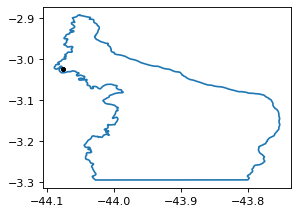

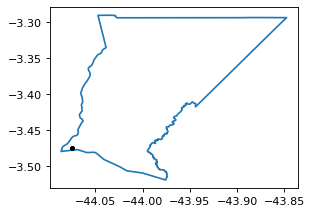

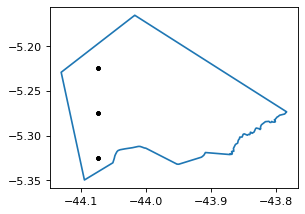

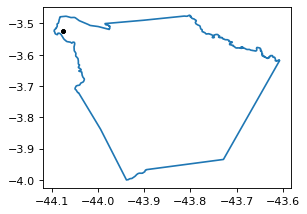

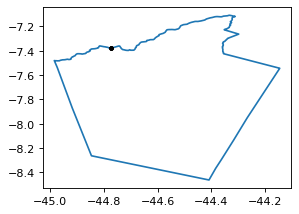

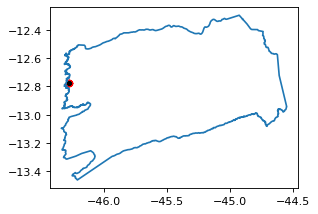

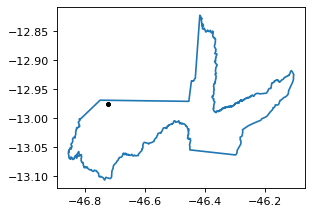

In [99]:
plot_muni(Cachoeira_Grande, Cachoeira_Grande_shape, 2102374)
plot_muni(Presidente_Vargas, Presidente_Vargas_shape, 2109304)
plot_muni(Senador_Alexandre_Costa, Senador_Alexandre_Costa_shape, 2111748)
plot_muni(Vargem_Grande, Vargem_Grande_shape, 2112704)
plot_muni(Uruçuí, Uruçuí_shape, 2211209)
#plot_muni(Formosa_Do_Rio_Preto, Formosa_Do_Rio_Preto_shape, 2911105)
plot_muni(São_Desidério, São_Desidério_shape, 2928901)
plot_muni(Campos_Belos, Campos_Belos_shape, 5204904)

#red dots are the nas in the data. They seem to be border points so we can discard them.

In [100]:
inds_to_drop = df[(df.murder_threats.isna() & (df.ID.isin([2102374, 2109304, 2111748, 2112704, 2211209, 2911105, 2928901, 5204904])))].index

In [101]:
df = df.drop(inds_to_drop, axis = 0)

In [102]:
df[df.murder_threats.isna()].groupby(['ID']).size()

Series([], dtype: int64)

In [103]:
dict(sorted((df.isna().sum()).to_dict().items(), key=lambda item: item[1]))

{'ID': 0,
 'forest.diff': 0,
 'FID': 0,
 'x': 0,
 'y': 0,
 'year': 0,
 'forest.l': 0,
 'nn_forest.l': 0,
 'rain1': 0,
 'elevation': 0,
 'slope': 0,
 'aspect': 0,
 'near_mines': 0,
 'near_roads': 0,
 'near_hidrovia': 0,
 'indigenous_homol': 0,
 'mun_election_year': 0,
 'new_forest_code': 0,
 'lula': 0,
 'dilma': 0,
 'temer': 0,
 'bolsonaro': 0,
 'fed_election_year': 0,
 'populacao': 0,
 'pib_pc': 0,
 'ironore': 0,
 'silver': 0,
 'copper': 0,
 'gold': 0,
 'soy_price': 0,
 'beef_price': 0,
 'ag_jobs': 0,
 'mining_jobs': 0,
 'public_jobs': 0,
 'construction_jobs': 0,
 'PIB': 0,
 'n_companies_PUBLIC ADMIN': 0,
 'n_companies_AGRICULTURE': 0,
 'n_companies_FOOD AND DRINKS': 0,
 'n_companies_ACCOMODATION AND FOOD': 0,
 'n_companies_EQUIPMENT RENTAL': 0,
 'n_companies_WHOLESALE': 0,
 'n_companies_ASSOCIATIVE ACTIVITIES': 0,
 'n_companies_AUTOMOBILES AND TRANSPORT': 0,
 'n_companies_FINANCIAL ASSISTANCE': 0,
 'n_companies_TRADE REP VEHICLES': 0,
 'n_companies_CONSTRUCTION': 0,
 'n_companies_MAIL

## Political Variables

In [110]:
vote_full = pd.read_csv('Users/annieulichney/Documents/GitHub/Deforestation/PoliticalData.csv', index_col = 0)

/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (35,40,60,70,72,82) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [111]:
vote = vote_full[['ano', 'id_municipio', 'runoff', 'winner_turno1', 'winner_turno2',
       'totalvotes_turno1', 'totalvotes_turno2', 'winner_votes_turno_1',
       'winner_votes_turno_2', 'margin_turno1', 'margin_turno2', 'incumbant',
       'term_limited_seat', 'overall_winner', 'tipo', 'special',
       'overall_winner_numero_candidato', 'winner_turno1_sequencial_candidato',
       'winner_turno1_numero_candidato', 'overall_winner_sequencial_candidato',
       'turno1_votes', 'runnerup_turno1',
       'runnerup_turno1_sequencial_candidato',
       'runnerup_turno1_numero_candidato', 'runnerup_turno1_votes',
       'winner_turno2_sequencial_candidato', 'winner_turno2_numero_candidato',
       'runnerup_turno2', 'runnerup_turno2_sequencial_candidato',
       'runnerup_turno2_numero_candidato', 'runnerup_turno2_votes',
       'winner_special', 'winner_special_sequencial_candidato',
       'winner_special_numero_candidato', 'outcomes', 'special_votes',
       'runnerup_special', 'runnerup_special_sequencial_candidato',
       'runnerup_annie_idrunnerup_special_numero_candidato',
       'runnerup_annie_id', 'runnerup_special_votes', 'margin_special',
       'winner_votes_special', 'totalvotes_special', 'winner', 'margin',
       'totalvotes', 'sequencial_candidato', 'numero_candidato',
       'winner_votes', 'winner_votes_proportion', 'runnerup',
       'runnerup_sequencial', 'runnerup_votes', 'runnerup_votes_proportion',
       'overall_winner_sequencial', 'overall_winner_numero',
       'id_municipio_tse', 'overall_winner_id_candidato_bd',
       'overall_winner_cpf', 'overall_winner_numero_partido',
       'overall_winner_sigla_partido', 'overall_winner_ocupacao',
       'overall_winner_municipio_nascimento', 'overall_winner_genero',
       'overall_winner_instrucao', 'overall_winner_nome',
       'overall_winner_nome_urna', 'overall_winner_estado_civil',
       'overall_winner_raca', 'overall_winner_idade', 'runnerup_cpf',
       'runnerup_numero_partido', 'runnerup_sigla_partido',
       'runnerup_ocupacao', 'runnerup_municipio_nascimento', 'runnerup_genero',
       'runnerup_instrucao', 'runnerup_nome', 'runnerup_nome_urna',
       'runnerup_estado_civil', 'runnerup_raca', 'runnerup_idade',
       'municipio']]

In [112]:
df

,ID,forest.diff,FID,x,y,year,forest.l,nn_forest.l,rain1,elevation,...,expen_other_agr,expen_agr_defense,expen_min_fuel,illegal_mining,illegal_other,illegal_industry,audits,emiss_pec_full,emiss_agr_full,emiss_agropec_full
0,1100015.0,0.0,8436645,-62.825,-12.925,2002,97.0,85.50,21.81664,154.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,488528.553429,5304.103889,4902816.0
1,1100015.0,16.0,8436646,-62.825,-12.875,2002,65.0,68.75,22.56391,146.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,488528.553429,5304.103889,4902816.0
2,1100015.0,5.0,8440244,-62.775,-12.975,2002,92.0,87.75,21.30135,156.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,488528.553429,5304.103889,4902816.0
3,1100015.0,9.0,8440245,-62.775,-12.925,2002,83.0,73.75,22.10585,156.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,488528.553429,5304.103889,4902816.0
4,1100015.0,13.0,8443844,-62.725,-12.975,2002,79.0,80.25,20.90614,155.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,488528.553429,5304.103889,4902816.0


In [115]:
df_pol = pd.merge(df, vote, how = 'left', left_on = ['ID', 'year'], right_on = ['id_municipio', 'ano'])